# **Import the required libraries** 

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
from keras import backend as K

Using TensorFlow backend.


# **importing drive library so that we can load the image from google drive**

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing VGG16 and opencv2**

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import cv2

# **Getting GRADCAM Image**

In [0]:
def get_gradcam_image(imageInput, model, layer_name, classindex=None):
    x = image.img_to_array(img_obj)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    preds = model.predict(x)
    if classindex is not None:
        class_idx = classindex
    else:
        class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]
    conv_layer = model.get_layer(layer_name)


    grads = K.gradients(class_output, conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
  
    no_of_channels = conv_layer.get_weights()[0].shape[-1]
    for i in range(no_of_channels):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

   
 #Heat Map of the image 
  
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 1e-7)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (imageInput.shape[1], imageInput.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)



    originalimage= np.uint8(imageInput)

    superimposed_img = cv2.addWeighted(originalimage, 0.5, heatmap, 0.5, 0)
    return superimposed_img

## **Get Model summary**



In [5]:
model = VGG16(weights="imagenet")
model.summary()











Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)   

## **Loading and resizing the Image**


In [0]:
from skimage import io
avenger_image="/content/drive/My Drive/Image.jpg"
img_obj = io.imread(avenger_image)
img_obj = cv2.resize(img_obj, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
class_idx=836


# **Display GradCAM images of layer before last convolutional layer** 

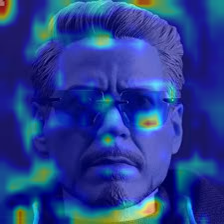

In [7]:
one_layer_before_last_conv_layer = "block4_conv1"
super_imposed_image = get_gradcam_image(img_obj, model, one_layer_before_last_conv_layer, class_idx)
from google.colab.patches import cv2_imshow
cv2_imshow(super_imposed_image)

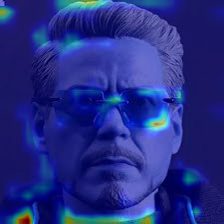

In [8]:
one_layer_before_last_conv_layer = "block4_conv2"
super_imposed_image = get_gradcam_image(img_obj, model, one_layer_before_last_conv_layer, class_idx)
from google.colab.patches import cv2_imshow
cv2_imshow(super_imposed_image)

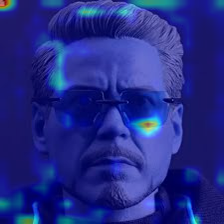

In [9]:
one_layer_before_last_conv_layer = "block4_conv3"
super_imposed_image = get_gradcam_image(img_obj, model, one_layer_before_last_conv_layer, class_idx)
from google.colab.patches import cv2_imshow
cv2_imshow(super_imposed_image)

# **Displaying GradCAM images of two layers before last convolutional layer**

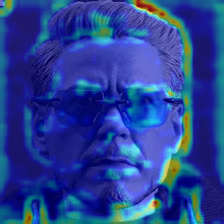

In [10]:
two_layer_before_last_conv_layer = "block3_conv1"
super_imposed_image = get_gradcam_image(img_obj, model, two_layer_before_last_conv_layer, class_idx)
from google.colab.patches import cv2_imshow
cv2_imshow(super_imposed_image)

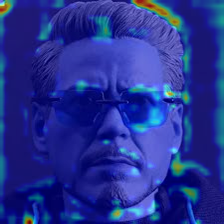

In [11]:
two_layer_before_last_conv_layer = "block3_conv2"
super_imposed_image = get_gradcam_image(img_obj, model, two_layer_before_last_conv_layer, class_idx)
from google.colab.patches import cv2_imshow
cv2_imshow(super_imposed_image)

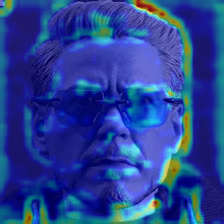

In [12]:
two_layer_before_last_conv_layer = "block3_conv1"
super_imposed_image = get_gradcam_image(img_obj, model, two_layer_before_last_conv_layer, class_idx)
from google.colab.patches import cv2_imshow
cv2_imshow(super_imposed_image)

**Increase in recepetive field from 29 to 45:-**

Receptive Field(RF) at Layer(L) = RF Layer (L-1) + 2^(Number of strides - Number of Deconvolution)*(Filter Size -1)

RF at Layer 7 = 29 + 2^(3-0) *(3-1) = 29 + 8*2 = 45

That is why the receptive field of layer 7 is 45x45x45 from 29x29x29 of layer 6



